# Figure 8

In [1]:
import numpy as np
import xarray as xr
from glob import glob
import gsw

import cosima_cookbook as cc

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.lines import Line2D
import matplotlib.path as mpath

import cartopy.crs as ccrs
import cmocean.cm as cmo

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/39153/status,
Dashboard: /proxy/39153/status,Workers: 7
Total threads: 28,Total memory: 251.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34995,Workers: 7
Dashboard: /proxy/39153/status,Total threads: 28
Started: Just now,Total memory: 251.19 GiB
Comm: tcp://127.0.0.1:45337,Total threads: 4
Dashboard: /proxy/44151/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:41941,


2025-10-29 23:14:26,123 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:43133'.
2025-10-29 23:14:26,126 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:37011'.
2025-10-29 23:14:26,128 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:41587'.
2025-10-29 23:14:26,155 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:45337'.
2025-10-29 23:14:26,198 - distributed.nanny - WARNING - Restarting worker
2025-10-29 23:14:26,204 - distributed.nanny - WARNING - Restarting worker
2025-10-29 23:14:26,213 - distributed.nanny - WARNING - Restarting worker
2025-10-29 23:14:26,235 - distributed.nanny - WARNING - Restarting worker
2025-10-29 23:14:26,239 - distributed.nanny - WARNING - Restarting worker
2025-10-29 23:14:26,245 - distributed.nanny - WARNING - Restarting worker
2025-10-29 23:14:26,339 - distributed.na

In [3]:
import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

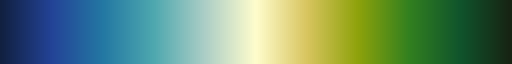

In [4]:
def colorbar_vert(cb, axes, label):
    cbaxes = fig.add_axes(axes)
    cbar = plt.colorbar(cb, cax = cbaxes, orientation = 'vertical',extend = 'both')
    cbar.set_label(label, fontsize=16, labelpad=6)
    return cbar

from palettable.cmocean.diverging import Balance_11
from palettable.cmocean.diverging import Delta_11

cmap_T = plt.get_cmap(Balance_11.mpl_colormap)
levels_T = np.arange(-1.5, 1.55, 0.1)
cmap_T.set_bad('k')
cmap_T

cmap_S = plt.get_cmap(Delta_11.mpl_colormap)
levels_S = np.arange(-0.6, 0.62, 0.04)
cmap_S.set_bad('k')
cmap_S

In [5]:
path = '/g/data/e14/hd4873/access-om2-01/project03_misc_data/isobath_aligned_transects/'

# temperature
control_temp = xr.open_dataset(path+'temp_control.nc')
ssp245mw_temp = xr.open_dataset(path+'temp_ssp245mw.nc')
ssp585mw_temp = xr.open_dataset(path+'temp_ssp585mw.nc')
control_temp = control_temp.__xarray_dataarray_variable__.rename('temp')
ssp245mw_temp = ssp245mw_temp.__xarray_dataarray_variable__.rename('temp')
ssp585mw_temp = ssp585mw_temp.__xarray_dataarray_variable__.rename('temp')

control_sig0 = xr.open_dataset(path+'sigma0_control.nc')
ssp245mw_sig0 = xr.open_dataset(path+'sigma0_ssp245mw.nc')
ssp585mw_sig0 = xr.open_dataset(path+'sigma0_ssp585mw.nc')
control_sig0 = control_sig0.__xarray_dataarray_variable__.rename('sig0')
ssp245mw_sig0 = ssp245mw_sig0.__xarray_dataarray_variable__.rename('sig0')
ssp585mw_sig0 = ssp585mw_sig0.__xarray_dataarray_variable__.rename('sig0')

In [6]:
# restrict to WEST ANTARCTICA
l1,l2,l3 = -103,-115,80

# temp
control_mean_T = control_temp.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp245mw_mean_T = ssp245mw_temp.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585mw_mean_T = ssp585mw_temp.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')

# sigma0
control_mean_sig0 = control_sig0.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp245mw_mean_sig0 = ssp245mw_sig0.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')
ssp585mw_mean_sig0 = ssp585mw_sig0.where(((control_temp.xt_ocean < l1) & (control_temp.xt_ocean >= l2) | (control_temp.xt_ocean  > l3)), np.nan).mean('xt_ocean')

In [7]:
def figure(panel_labels, simulation_labels):

    plt.rcParams.update({'font.size': 15})
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5),sharex=True,sharey=True)
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

    for i, ax in enumerate(axes.flatten()):
        ax.set_facecolor('dimgrey')
        ax.text(0.02, 0.04, f'{labels[i]}',  c='k', fontsize=24, ha='left', fontweight='bold', transform=ax.transAxes)
        ax.text(0.97, 0.06, f'{np.tile(sim_labels,2)[i]}', fontsize=18, fontweight='bold', color='dimgrey', ha='right', transform=ax.transAxes,
                bbox=dict(facecolor='w', alpha=0.8, edgecolor='dimgrey', boxstyle='round,pad=0.2'), zorder=3)
    
    # set limits and labels
    axes[0].set_ylim([1800,0])
    axes[0].set_xlim([-4.5,4])
    axes[0].set_ylabel('Depth (m)')
    axes[0].set_yticks([0,250,500,750,1000,1250,1500,1750])

    axes[0].text(0.67, -0.18, 'Latitude (\u00b0 relative to 1000 m isobath)', c='k', fontsize=16, transform=axes[0].transAxes)
    
    return fig, axes
    

In [8]:
adjusted_lats = control_mean_T.yt_isobath_rel
depth = control_mean_T.st_ocean

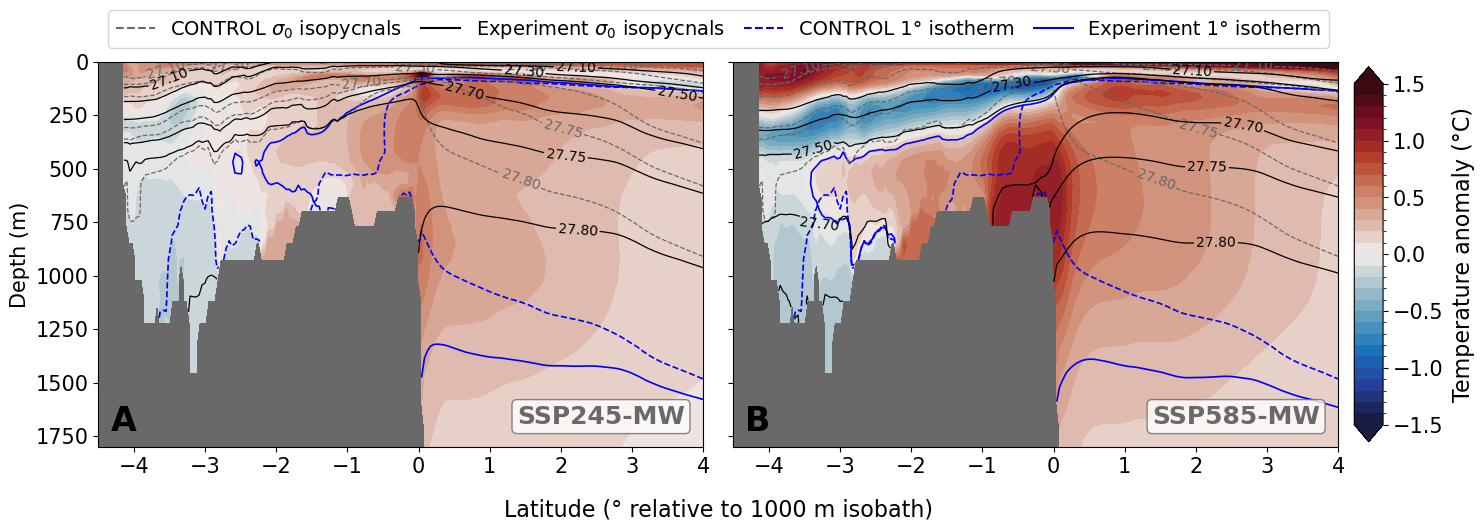

2025-10-29 23:14:26,125 - distributed.worker - WARNING - Scheduler was unaware of this worker; shutting down.
2025-10-29 23:14:26,127 - distributed.worker - WARNING - Scheduler was unaware of this worker; shutting down.
2025-10-29 23:14:26,130 - distributed.worker - WARNING - Scheduler was unaware of this worker; shutting down.


In [9]:
labels = ['A','B',]
sim_labels = ['SSP245-MW','SSP585-MW',]

fig, axes = figure(labels, sim_labels)

# Shade temperature anomalies
axes[0].contourf(adjusted_lats, depth, ssp245mw_mean_T - control_mean_T,
                 cmap=cmap_T, norm=mpl.colors.BoundaryNorm(levels_T, ncolors=cmap_T.N, clip=False), 
                 levels=levels_T, extend='both')
cbT = axes[1].contourf(adjusted_lats, depth, ssp585mw_mean_T - control_mean_T,
                       cmap=cmap_T, norm=mpl.colors.BoundaryNorm(levels_T, ncolors=cmap_T.N, clip=False), 
                       levels=levels_T, extend='both')
# add colorbar
cbar = colorbar_vert(cbT, [0.91, 0.12, 0.018, 0.75], 'Temperature anomaly (\u00b0C)')
cbar.ax.set_yticks([ -1.5, -1.0, -0.5, 0,0.5,1.0,1.5])

# contour temperature proxy for mCDW
lw_cdw, cdw_temp, c = 1.2, 1.0, 'b'
for i, ax in enumerate(axes.flatten()):
    ax.contour(adjusted_lats, depth, control_mean_T, 
               colors=c, levels=[cdw_temp], linestyles='--', linewidths=lw_cdw, 
               label=f'CONTROL 1\u00b0 isotherm')
axes[0].contour(adjusted_lats, depth, ssp245mw_mean_T, 
                colors=c, levels=[cdw_temp], linestyles='-', linewidths=lw_cdw)
axes[1].contour(adjusted_lats, depth, ssp585mw_mean_T, 
                colors=c, levels=[cdw_temp], linestyles='-', linewidths=lw_cdw)

# contour density levels in each simulation
lvls = [27.1, 27.3, 27.5, 27.7, 27.75, 27.8, 27.85]
for i, ax in enumerate(axes):
    cs = ax.contour(adjusted_lats[:-200], depth, control_mean_sig0[:,:-200], 
                    levels=lvls, colors='dimgrey', linewidths=0.9, linestyles='--', zorder=2)
    ax.clabel(cs, lvls,use_clabeltext=True, inline=True, inline_spacing=2, fontsize=10, zorder=2)

cs = axes[0].contour(adjusted_lats[:-200], depth, ssp245mw_mean_sig0[:,:-200], 
                     levels=lvls, colors='k', linewidths=0.9, zorder=2)
axes[0].clabel(cs, lvls,use_clabeltext=True, inline=True, inline_spacing=2, fontsize=10, zorder=2)

cs = axes[1].contour(adjusted_lats[:-200], depth, ssp585mw_mean_sig0[:,:-200], 
                     levels=lvls, colors='k', linewidths=0.9, zorder=2)
axes[1].clabel(cs, lvls, use_clabeltext=True, inline=True, inline_spacing=2, fontsize=10, zorder=2)

# add legend
line1 = Line2D([0], [0], color='dimgrey', linestyle='--')
line2 = Line2D([0], [0], color='k', linestyle='-')
line3 = Line2D([0], [0], color='b', linestyle='--')
line4 = Line2D([0], [0], color='b', linestyle='-')
legend_labels = [f'CONTROL $\sigma_0$ isopycnals', 
                 f'Experiment $\sigma_0$ isopycnals',
                 f'CONTROL 1\u00b0 isotherm', 
                 f'Experiment 1\u00b0 isotherm' ]
axes[0].legend([line1, line2, line3, line4], legend_labels, bbox_to_anchor=[0.0, 1.16], 
               loc='upper left', fontsize=14, ncols=4, columnspacing=1)

# save figure
fig.savefig('../figs/Fig08_AS_temperture_transects_revised.jpg', dpi=300, bbox_inches='tight')

plt.show()